In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df.sample(5)

,Class label,Alcohol,Malic acid
175,3,13.27,4.28
31,1,13.58,1.66
115,2,11.03,1.51
65,2,12.37,1.21
75,2,11.66,1.88


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

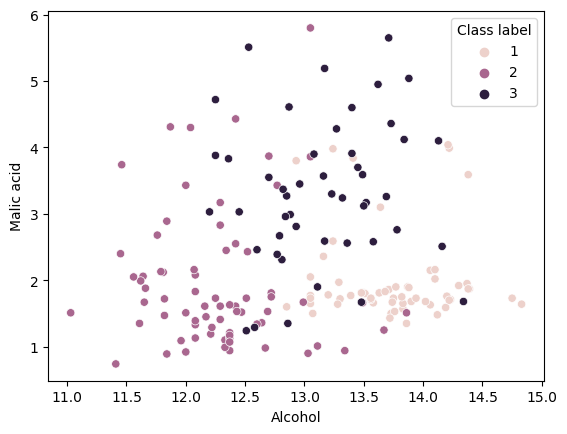

In [4]:
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'],hue = df['Class label'])

<Axes: xlabel='Alcohol', ylabel='Density'>

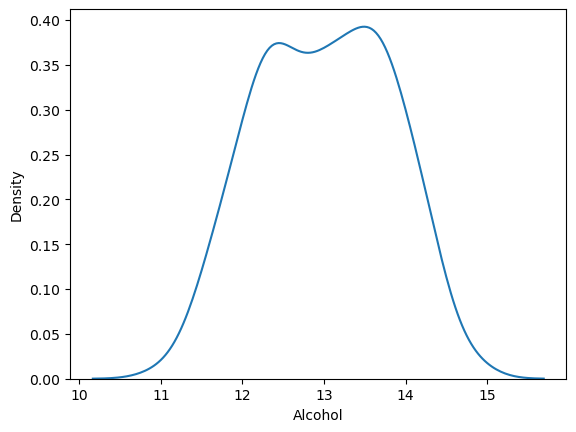

In [12]:
# plt.figure(figsize=(9,5))
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

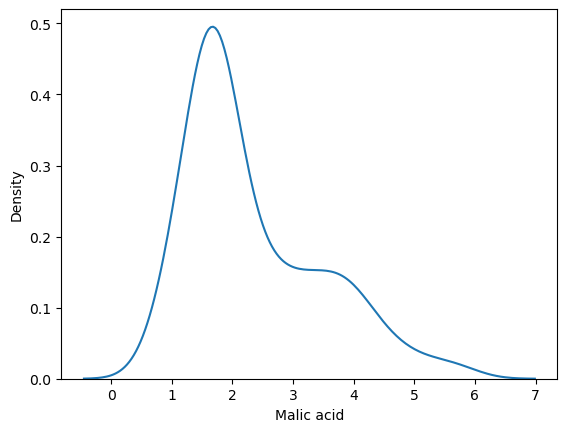

In [11]:
sns.kdeplot(df['Malic acid'])

In [13]:
df.sample(2)

,Class label,Alcohol,Malic acid
51,1,13.83,1.65
105,2,12.42,2.55


In [54]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train ,y_test = train_test_split(df.drop('Class label',axis = 1),
                                                  df['Class label'],random_state = 2)

In [55]:
x_train.shape

(133, 2)

In [56]:
y_train.shape

(133,)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [77]:
scaler.fit(x_train,y_train)

MinMaxScaler()

In [78]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [79]:
x_train_scaled

array([[0.25526316, 0.51731161],
       [0.26578947, 0.69450102],
       [0.53157895, 0.17922607],
       [0.65      , 0.45417515],
       [0.54736842, 0.02443992],
       [0.53157895, 1.        ],
       [0.2       , 0.25254582],
       [0.15263158, 0.09368635],
       [0.43157895, 0.01832994],
       [0.33157895, 0.46435845],
       [0.48684211, 0.42769857],
       [0.64473684, 0.15885947],
       [0.59473684, 0.21995927],
       [0.74473684, 0.12627291],
       [0.30789474, 0.43584521],
       [0.45789474, 0.51731161],
       [0.61315789, 0.3401222 ],
       [0.48421053, 0.75763747],
       [0.81315789, 0.12016293],
       [0.47105263, 0.50509165],
       [0.59210526, 0.15274949],
       [0.54736842, 0.20570265],
       [0.        , 0.12627291],
       [0.69473684, 0.07331976],
       [0.84210526, 0.16700611],
       [0.59736842, 0.16904277],
       [0.64736842, 0.54989817],
       [0.39210526, 0.31364562],
       [0.35263158, 0.03665988],
       [0.79736842, 0.15071283],
       [0.

In [80]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)

In [81]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [82]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,133.0,133.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.3,1.5
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [83]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,133.0,133.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [87]:
y_pred=lr.predict(x_test_scaled)

In [88]:
from sklearn.metrics import r2_score

In [89]:
print("R2_Score",r2_score(y_test,y_pred))

R2_Score 0.3183591397002312


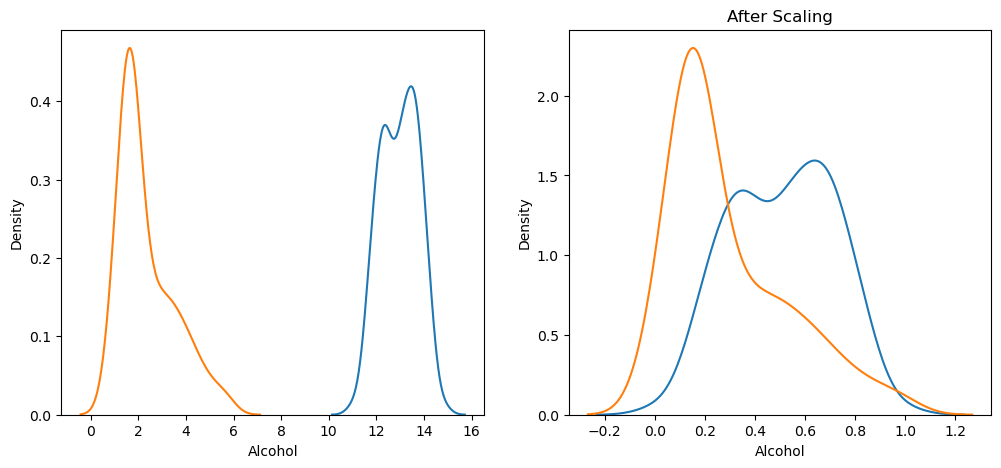

In [90]:
## now we will conpare the scaled value and normal value 
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

plt.title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax = ax1)
sns.kdeplot(x_train['Malic acid'],ax = ax1)

plt.title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax = ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax = ax2)

plt.show()

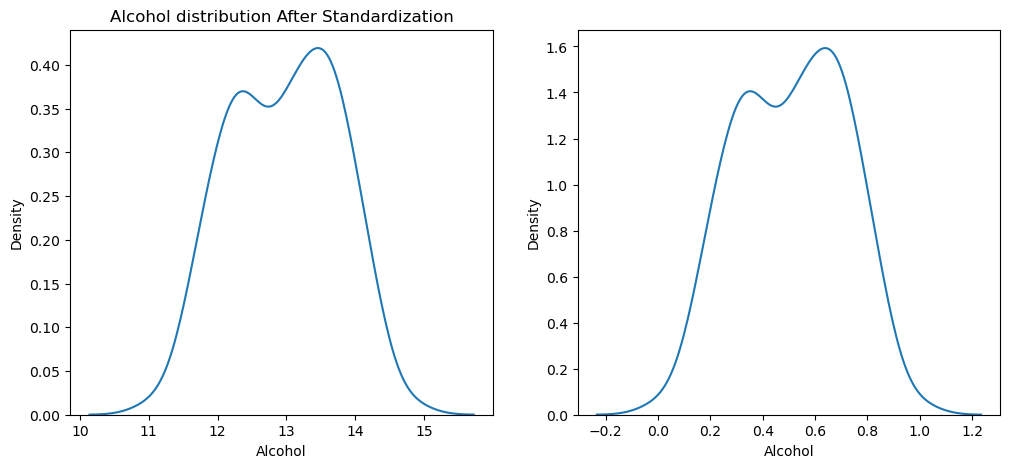

In [91]:
## will see the alcohol distribution 

fig,(ax1,ax2)=plt.subplots(ncols = 2 ,figsize=(12,5))
ax1.set_title("Alcohol distribution before Scaling")
sns.kdeplot(x_train['Alcohol'],ax= ax1)

ax1.set_title("Alcohol distribution After Standardization")
sns.kdeplot(x_train_scaled['Alcohol'],ax= ax2)

plt.show()